In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd
from torch.autograd import Variable
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from numpy.random import randn
import torchvision.utils
from torch.distributions import uniform
from mpl_toolkits.axes_grid1 import ImageGrid
import os
import copy
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from modules import *
from utils import *

Variables Created in ddpm.py


<Figure size 10000x10000 with 0 Axes>

In [2]:
## CONFIG
config = get_config()

ROOT = os.getcwd()
DATA_DIR = os.path.join(ROOT,"data")
CHECKPOINT_PATH = os.path.join( ROOT , 'checkpoints', 'model.pth.tar')

print('Imports finished')
device = "cuda" if torch.cuda.is_available() else "cpu"

Imports finished


# Generation

## Cast-forged AZ80 Magnesium Alloy Microstructure Image Generation

In [3]:

"""
Select process parameters from valid enteries for each parameter below

"""

#Cast geometry {valid enteries: "cylinder" or "preform"}
cast_geometry = "cylinder"
#Metallography sample location {valid enteries: "tall", "web", or "short"}
metallography_location = "web"
#Casting cooling rate {valid enteries: "1.5", "6", or "10.4"}
casting_cooling_rate = "6"
#Soaking process {valid enteries: "normal", "1.5h", or "2h"}
soaking_process = "normal"
#Heat treatment {valid enteries: "none" or "homogenization"}
heat_treatment = "none"
#Forging temperature {valid enteries: "250", "300", or "350"}
forging_temperature = "350"
#Image magnification {valid enteries: "100", "500", "1000", "1500", "2000", or "3000"}
magnification = "1000"

In [4]:
batch_size = 4
n_sampled_images = 1

image_shape = (1,512,512)
image_size = 512
image_dim = int(np.prod(image_shape))
learning_rate = 3e-4

shapes = 2
locations = 3
cooling_rates = 3
soaking_times = 3
forging_temps = 3
heat_treatments = 2
magnifications = 6
embedding_dim = 100
num_classes = 114

shp_dict =  {'cylinder':0, 'preform':1}
loc_dict =  {'tall':0, 'web':1, 'short':2}
cr_dict =  {'1.5':0, '6':1, '10.4':2}
sk_dict =  {'normal':0, '1.5h':1, '2h':2}
ht_dict =  {'none':0, 'homogenization':1}
ft_dict =  {'250':0, '300':1, '350':2}
mag_dict =  {'100':0, '500':1, '1000':2, '1500':3, '2000':4, '3000':5}


In [5]:
def show_grids(images):
 
    fig = plt.figure(figsize=(6.61, 6.61))
    #fig = plt.figure()
    #fig.set_dpi(100)
    grid = ImageGrid(fig, 111, 
                     nrows_ncols=(1,1),  
                     axes_pad=0.5
                     )
    plt.axis('off')
    j = 0
    for ax, im in zip(grid, images.cpu().view(-1,image_size,image_size)):
        ax.imshow(im, cmap = 'gray')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        #ax.title.set_text(labels_title[j])
        #ax.text(0.5, 0.5, 'synthesized \n ©Azqadan et al. 2023', transform=ax.transAxes,
        #fontsize=100, color='white', alpha=0.3,
        #ha='center', va='center', rotation=30)
        #ax.title.set_size(28)
        #fig.gca().set_title(labelt[i])
        j += 1
    
    plt.show()
    figname = str('Synthesize')
    fig.savefig(figname, bbox_inches='tight')
    plt.close(fig)
          
    
def load_model(address):
    if torch.cuda.is_available() == True:
        checkpoint = torch.load(address)
        model.load_state_dict(checkpoint["model_state"])
        ema_model.load_state_dict(checkpoint["ema_model_state"])
        optimizer.load_state_dict(checkpoint["model_optimizer"])
    else:
        checkpoint = torch.load(address, map_location=torch.device('cpu'))
        model.load_state_dict(checkpoint["model_state"])
        ema_model.load_state_dict(checkpoint["ema_model_state"])
        optimizer.load_state_dict(checkpoint["model_optimizer"])
        
print('Functions created')

Functions created


Class torch tensor loaded
moved tensor to device
Images generated


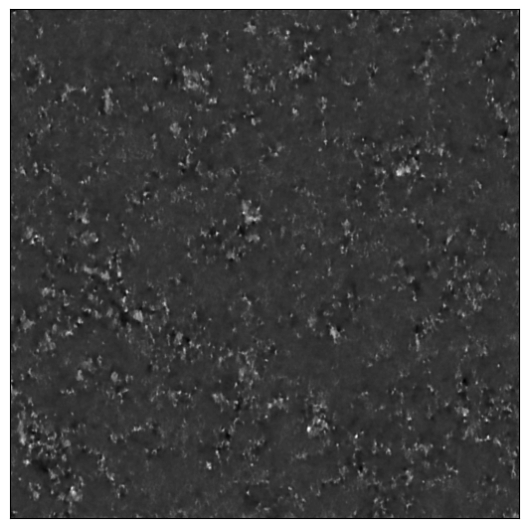

In [6]:
model = UNet_conditional(num_classes = num_classes).to(device)
ema_model = UNet_conditional(num_classes = num_classes).to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
diffusion = Diffusion(img_size = image_size)
load_model(CHECKPOINT_PATH)

with torch.no_grad():
    t_shp = torch.tensor([shp_dict[cast_geometry]])
    t_loc = torch.tensor([loc_dict[metallography_location]])
    t_cr = torch.tensor([cr_dict[casting_cooling_rate]])
    t_sk = torch.tensor([sk_dict[soaking_process]])
    t_ht = torch.tensor([ht_dict[heat_treatment]])
    t_ft = torch.tensor([ft_dict[forging_temperature]])
    t_mag = torch.tensor([mag_dict[magnification]])
    print('Class torch tensor loaded')

    t_shp = t_shp.long().to(device)
    t_loc = t_loc.long().to(device)
    t_cr = t_cr.long().to(device)
    t_sk = t_sk.long().to(device)
    t_ht = t_ht.long().to(device)
    t_ft = t_ft.long().to(device)
    t_mag = t_mag.long().to(device)
    print('moved tensor to device')
    ema_sampled_images = diffusion.sample(ema_model, n_sampled_images, t_shp, t_loc, t_cr, t_sk, t_ht, t_ft, t_mag, cfg_scale=0)
    print('Images generated')
    ema_sampled_images = reverse_transforms(ema_sampled_images)
    show_grids(ema_sampled_images)

In [7]:
"""
Select process parameters from valid enteries for each parameter below

"""
#Cast geometry {valid enteries: "cylinder" or "preform"}
cast_geometry = "preform"
#Metallography sample location {valid enteries: "tall", "web", or "short"}
metallography_location = "tall"
#Casting cooling rate {valid enteries: "1.5", "6", or "10.4"}
casting_cooling_rate = "1.5"
#Soaking process {valid enteries: "normal", "1.5h", or "2h"}
soaking_process = "2h"
#Heat treatment {valid enteries: "none" or "homogenization"}
heat_treatment = "none"
#Forging temperature {valid enteries: "250", "300", or "350"}
forging_temperature = "250"
#Image magnification {valid enteries: "100", "500", "1000", "1500", "2000", or "3000"}
magnification = "100"

In [8]:
batch_size = 4
n_sampled_images = 1

image_shape = (1,512,512)
image_size = 512
image_dim = int(np.prod(image_shape))
learning_rate = 3e-4

shapes = 2
locations = 3
cooling_rates = 3
soaking_times = 3
forging_temps = 3
heat_treatments = 2
magnifications = 6
embedding_dim = 100
num_classes = 114

shp_dict =  {'cylinder':0, 'preform':1}
loc_dict =  {'tall':0, 'web':1, 'short':2}
cr_dict =  {'1.5':0, '6':1, '10.4':2}
sk_dict =  {'normal':0, '1.5h':1, '2h':2}
ht_dict =  {'none':0, 'homogenization':1}
ft_dict =  {'250':0, '300':1, '350':2}
mag_dict =  {'100':0, '500':1, '1000':2, '1500':3, '2000':4, '3000':5}


Class torch tensor loaded
moved tensor to device
Images generated


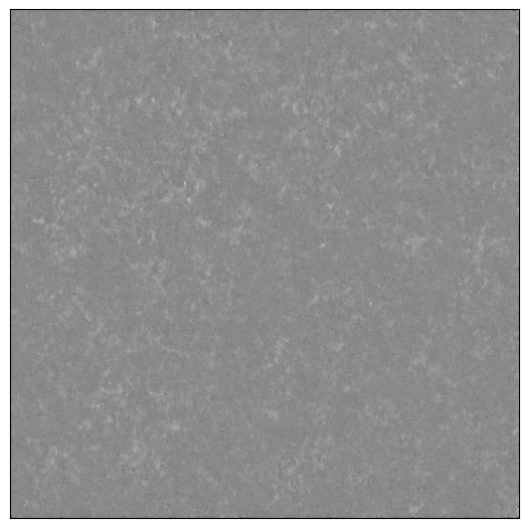

In [10]:
with torch.no_grad():
    t_shp = torch.tensor([shp_dict[cast_geometry]])
    t_loc = torch.tensor([loc_dict[metallography_location]])
    t_cr = torch.tensor([cr_dict[casting_cooling_rate]])
    t_sk = torch.tensor([sk_dict[soaking_process]])
    t_ht = torch.tensor([ht_dict[heat_treatment]])
    t_ft = torch.tensor([ft_dict[forging_temperature]])
    t_mag = torch.tensor([mag_dict[magnification]])
    print('Class torch tensor loaded')

    t_shp = t_shp.long().to(device)
    t_loc = t_loc.long().to(device)
    t_cr = t_cr.long().to(device)
    t_sk = t_sk.long().to(device)
    t_ht = t_ht.long().to(device)
    t_ft = t_ft.long().to(device)
    t_mag = t_mag.long().to(device)
    print('moved tensor to device')
    ema_sampled_images = diffusion.sample(ema_model, n_sampled_images, t_shp, t_loc, t_cr, t_sk, t_ht, t_ft, t_mag, cfg_scale=0)
    print('Images generated')
    ema_sampled_images = reverse_transforms(ema_sampled_images)
    show_grids(ema_sampled_images)